##  Regression

### Linear Regression

In [1]:
# Simple Linear Regression/ Univariant Linear Regression (one variable)

Y=b0+b1X

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)   #configyration parameter( to scale the plot)

data=pd.read_csv(r'C:/Users/Shambhavi/Downloads/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [22]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [23]:
#mean of x and y
mean_x=np.mean(X)
mean_y=np.mean(Y)

m=len(X)

numer=0
denom=0
for i in range(m):
    numer +=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)

print(b1,b0)
 
    

0.26342933948939945 325.57342104944223


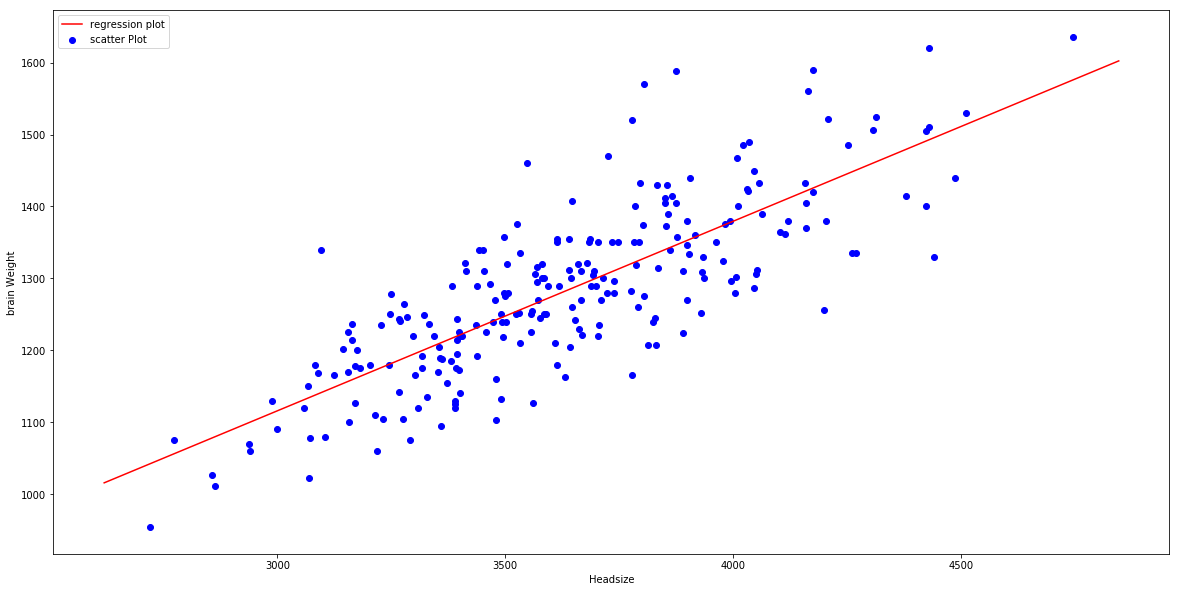

In [24]:
max_x=np.max(X)+100
min_x=np.min(X)-100

x=np.linspace(min_x,max_x,1000)
y=b0+b1*x
plt.plot(x,y,color="red",label="regression plot")
plt.scatter(X,Y,color="blue",label="scatter Plot")
plt.xlabel("Headsize")
plt.ylabel("brain Weight")
plt.legend()
plt.show()

In [25]:
rmse=0
for i in range(m):
    y_pred=b0+b1*X[i]
    rmse+=(Y[i]-y_pred)**2
rmse=np.sqrt(rmse/m)
print(rmse)

72.1206213783709


In [26]:
ss_t=0
ss_r=0
for i in range(m):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t) 
print(r2)

0.6393117199570003


## Using Sci-Kit

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# cannot use rank 1 matrix in scikit learn
X=X.reshape((m,1))

#creating model
reg=LinearRegression()
reg=reg.fit(X,Y)
# Y prediction
Y_pred=reg.predict(X)

#calculating RMSE and R2 Score

mse=mean_squared_error(Y,Y_pred)   #mse is used for error and score is used for accuracy



rmse=np.sqrt(mse)
r2_score=reg.score(X,Y)

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957


In [30]:
pred= reg.predict(2000)
pred

array([852.43210003])